In [1]:
# Dependencies
from scipy.stats import poisson 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Function to retrieve EPL matches from any given year
def get_premier_league_data(start_year):
    season = str(start_year)[-2:] + str(start_year + 1)[-2:]
    data = pd.read_csv("https://www.football-data.co.uk/mmz4281/" + season + "/E0.csv") 
    return data

In [3]:
# Get data from the 2018/2019 season
data = get_premier_league_data(2021)
data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [4]:
# Filtering columns of interest
columns = ["HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR"]
data = data[columns]

# Renaming columns
data = data.rename(
    columns={"FTHG": "HomeGoals", "FTAG": "AwayGoals", "FTR": "Result"}
)

In [5]:
# Remove final week of fixtures
data[:-10]

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
0,Liverpool,Norwich,4,1,H
1,West Ham,Man City,0,5,A
2,Bournemouth,Sheffield United,1,1,D
3,Burnley,Southampton,3,0,H
4,Crystal Palace,Everton,0,0,D
...,...,...,...,...,...
365,Wolves,Crystal Palace,2,0,H
366,Watford,Man City,0,4,A
367,Aston Villa,Arsenal,1,0,H
368,Man United,West Ham,1,1,D


In [6]:
data.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
0,Liverpool,Norwich,4,1,H
1,West Ham,Man City,0,5,A
2,Bournemouth,Sheffield United,1,1,D
3,Burnley,Southampton,3,0,H
4,Crystal Palace,Everton,0,0,D


In [7]:
# Compute the average number of home and away goals 
print(data['Result'].value_counts())
print(round(data['HomeGoals'].mean()))
print(round(data['AwayGoals'].mean()))

H    172
A    116
D     92
Name: Result, dtype: int64
2
1


<AxesSubplot:>

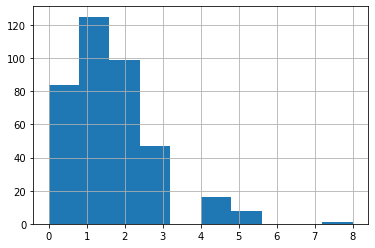

In [12]:
data['HomeGoals'].hist()

<AxesSubplot:>

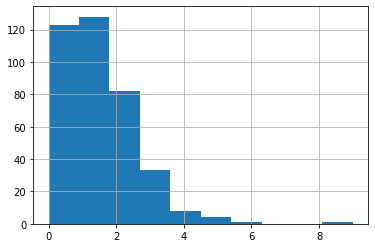

In [13]:
data['AwayGoals'].hist()